# For Text Mining assignment
 
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [81]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews= []

In [82]:
iphone_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip

In [83]:
# Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [84]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [85]:
iphone_snapdeal

['IPhone 5c good product on good price. Within one day I got the product though in site specied 3 working days.',
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars',
 'genuine product delivered within scheduled timframe. Thanks snapdeal !',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'Quality product from snapdeal. Delivery was on time.',
 'Lacks the feel.',
 'Great product at such amazing price. Delivery was fast. N iPhone is amazing.',
 'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earli

## Importing Libraries

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Importing Data

In [87]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['IPhone 5c good product on good price. Within one day I got the product though in site specied 3 working days.','Pros : Picture quality is awesome,sound with hearing ad is good,look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone,You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars','genuine product delivered within scheduled timframe. Thanks snapdeal !',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'Quality product from snapdeal. Delivery was on time.','Lacks the feel.',...,'dream come true','The product supplied by Snapdeal is very good at best price. It is as shown','I am very much happy with my product thanks to SNEPDEAL.','Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .','good as like iphone,apple,and snapdeal service was good','It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot','i bought iphone 5c from snapdeal and the product is absolutly real and it wors properly .. price is also very low then the other online shoping sides ... so thnxx to snapdeal adorable phone and top class service ð']


In [88]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'[\'IPhone 5c good product on good price. Within one day I got the product though in site specied 3 working days.\'  \'Pros : Picture quality is awesome  sound with hearing ad is good  look and feel is good \\n \\ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone  You have to use some file transfer app like shareit.\\n\\nOther is good. I am new to iphone so till now this is it.\\n\\niPhone 5c + Snapdeal before time delivery = 4 stars\'  \'genuine product delivered within scheduled timframe. Thanks snapdeal !\'  "The OS will take around 5GB  leaving only 3 GB for your files. Unless you\'re not a heavy files user."  \'Quality product from snapdeal. Delivery was on time.\'  \'Lacks the feel.\'  \'Great product at such amazing price. Delivery was fast. N iPhone is amazing.\'  \'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original 

In [89]:
# Remove Punctuations 
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'IPhone 5c good product on good price Within one day I got the product though in site specied 3 working days  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  genuine product delivered within scheduled timframe Thanks snapdeal   The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Quality product from snapdeal Delivery was on time  Lacks the feel  Great product at such amazing price Delivery was fast N iPhone is amazing  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  goood fast shipping  Mobile was got 

In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'IPhone 5c good product on good price Within one day I got the product though in site specied 3 working days  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  genuine product delivered within scheduled timframe Thanks snapdeal   The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Quality product from snapdeal Delivery was on time  Lacks the feel  Great product at such amazing price Delivery was fast N iPhone is amazing  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  goood fast shipping  Mobile was got 

In [93]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['IPhone', '5c', 'good', 'product', 'on', 'good', 'price', 'Within', 'one', 'day', 'I', 'got', 'the', 'product', 'though', 'in', 'site', 'specied', '3', 'working', 'days', 'Pros', 'Picture', 'quality', 'is', 'awesome', 'sound', 'with', 'hearing', 'ad', 'is', 'good', 'look', 'and', 'feel', 'is', 'good', 'n', 'ncons', 'You', 'can', 'not', 'transfer', 'files', 'using', 'bluetooth', 'from', 'andriodblackberrywindows', 'to', 'iphone', 'You', 'have', 'to', 'use', 'some', 'file', 'transfer', 'app', 'like', 'shareitnnOther', 'is', 'good', 'I', 'am', 'new', 'to', 'iphone', 'so', 'till', 'now', 'this', 'is', 'itnniPhone', '5c', 'Snapdeal', 'before', 'time', 'delivery', '4', 'stars', 'genuine', 'product', 'delivered', 'within', 'scheduled', 'timframe', 'Thanks', 'snapdeal', 'The', 'OS', 'will', 'take', 'around', '5GB', 'leaving', 'only', '3', 'GB', 'for', 'your', 'files', 'Unless', 'youre', 'not', 'a', 'heavy', 'files', 'user', 'Quality', 'product', 'from', 'snapdeal', 'Delivery', 'was', 'on', 't

In [94]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
# Tokens count
len(text_tokens)

1573

In [96]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['IPhone', '5c', 'good', 'product', 'good', 'price', 'Within', 'one', 'day', 'got', 'product', 'though', 'site', 'specied', '3', 'working', 'days', 'Pros', 'Picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'You', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'You', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnOther', 'good', 'new', 'iphone', 'till', 'itnniPhone', '5c', 'Snapdeal', 'time', 'delivery', '4', 'stars', 'genuine', 'product', 'delivered', 'within', 'scheduled', 'timframe', 'Thanks', 'snapdeal', 'The', 'OS', 'take', 'around', '5GB', 'leaving', '3', 'GB', 'files', 'Unless', 'youre', 'heavy', 'files', 'user', 'Quality', 'product', 'snapdeal', 'Delivery', 'time', 'Lacks', 'feel', 'Great', 'product', 'amazing', 'price', 'Delivery', 'fast', 'N', 'iPhone', 'amazing', 'happy', 'iPhone', 'ordering', 'phone', 'little', 'doubt', 'But', 'receiving', 'phone', 'really', 'happyalso', 'found', 'o

In [97]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iphoneearlier', 'doubted', 'goood', 'fast', 'shipping', 'mobile', 'got', 'hang', 'smooth', 'touch', 'performing', 'well', 'this', 'great', 'experience', 'iphone', 'snapdeal', 'delivery', 'expectation', 'satisfied', 'buy', 'products', 'snapdeal', 'really', 'happy', 'product', 'servicealways', 'best', 'good', 'product', 'do', 'hang', 'samsung', 'products', 'pathetic', 'used', 'grand', 'qauttro', 'use', 'take', '2030', 'seconds', 'open', 'even', 'contact', 'listnnapple', 'quality', 'product', 'only', 'problem', 'need', 'pay', 'everything', 'good', 'product', 'packing', 'also', 'good', 'issue', 'courier', 'servicethey', 'took', '10', 'days', 'deliver', 'awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shoping', 'its', 'cool', 'phone', 'good', 'processing', 'latest', 'ios', 'the', 'cons', 'low', 'memory', 'space', 'there', 'total', '8', 'gb', 'space', 'almost']


In [98]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['receiv', 'phone', 'realli', 'happyalso', 'found', 'origin', 'iphoneearli', 'doubt', 'goood', 'fast', 'ship', 'mobil', 'got', 'hang', 'smooth', 'touch', 'perform', 'well', 'thi', 'great', 'experi', 'iphon', 'snapdeal', 'deliveri', 'expect', 'satisfi', 'buy', 'product', 'snapdeal', 'realli', 'happi', 'product', 'servicealway', 'best', 'good', 'product', 'do', 'hang', 'samsung', 'product', 'pathet', 'use', 'grand', 'qauttro', 'use', 'take', '2030', 'second', 'open', 'even', 'contact', 'listnnappl', 'qualiti', 'product', 'onli', 'problem', 'need', 'pay', 'everyth', 'good', 'product', 'pack', 'also', 'good', 'issu', 'courier', 'servicethey', 'took', '10', 'day', 'deliv', 'awsm', 'delivri', 'time', 'product', 'recievd', 'good', 'condit', 'think', 'awsm', 'site', 'shope', 'it', 'cool', 'phone', 'good', 'process', 'latest', 'io', 'the', 'con', 'low', 'memori', 'space', 'there', 'total', '8', 'gb', 'space', 'almost']


In [99]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

iphone 5c good product good price within one day got product though site specied 3 working days pros picture quality awesome sound hearing ad good look feel good n ncons you transfer files using bluetooth andriodblackberrywindows iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 stars genuine product delivered within scheduled timframe thanks snapdeal the os take around 5gb leaving 3 gb files unless youre heavy files user quality product snapdeal delivery time lacks feel great product amazing price delivery fast n iphone amazing happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted goood fast shipping mobile got hang smooth touch performing well this great experience iphone snapdeal delivery expectation satisfied buy products snapdeal really happy product servicealways best good product do hang samsung products pathetic used grand qauttro use take 2030 seconds ope

In [100]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['iphone', '5c', 'good', 'product', 'good', 'price', 'within', 'one', 'day', 'get', 'product', 'though', 'site', 'specie', '3', 'working', 'day', 'pro', 'picture', 'quality', 'awesome', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphone', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'star', 'genuine', 'product', 'deliver', 'within', 'schedule', 'timframe', 'thank', 'snapdeal', 'the', 'os', 'take', 'around', '5', 'gb', 'leave', '3', 'gb', 'file', 'unless', 'you', 're', 'heavy', 'file', 'user', 'quality', 'product', 'snapdeal', 'delivery', 'time', 'lack', 'feel', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amaze', 'happy', 'iphone', 'order', 'phone', 'little', 'doubt', 'but', 'receive', 'phone', 'really', 'happyalso', 'find', 'original', 'iphoneearl

In [101]:
clean_comments= ' '.join(lemmas)
clean_comments

'iphone 5c good product good price within one day get product though site specie 3 working day pro picture quality awesome sound hear ad good look feel good n ncon you transfer file use bluetooth andriodblackberrywindow iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 star genuine product deliver within schedule timframe thank snapdeal the os take around 5 gb leave 3 gb file unless you re heavy file user quality product snapdeal delivery time lack feel great product amazing price delivery fast n iphone amaze happy iphone order phone little doubt but receive phone really happyalso find original iphoneearli doubted goood fast shipping mobile get hang smooth touch perform well this great experience iphone snapdeal delivery expectation satisfied buy product snapdeal really happy product servicealway good good product do hang samsung product pathetic use grand qauttro use take 2030 second open even contact listnnapple quality p

In [102]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [103]:
print(cv.vocabulary_)

{'iphone': 174, '5c': 7, 'good': 145, 'product': 265, 'price': 257, 'within': 401, 'one': 228, 'day': 91, 'get': 142, 'though': 365, 'site': 328, 'specie': 342, 'working': 406, 'pro': 262, 'picture': 249, 'quality': 278, 'awesome': 34, 'sound': 339, 'hear': 157, 'ad': 15, 'look': 193, 'feel': 128, 'ncon': 215, 'you': 411, 'transfer': 377, 'file': 129, 'use': 387, 'bluetooth': 45, 'andriodblackberrywindow': 26, 'app': 28, 'like': 189, 'shareitnnother': 317, 'new': 220, 'till': 368, 'itnniphone': 180, 'snapdeal': 334, 'time': 369, 'delivery': 98, 'star': 343, 'genuine': 141, 'deliver': 97, 'schedule': 305, 'timframe': 371, 'thank': 355, 'the': 358, 'os': 235, 'take': 352, 'around': 30, 'gb': 140, 'leave': 187, 'unless': 382, 're': 285, 'heavy': 159, 'user': 389, 'lack': 183, 'great': 149, 'amazing': 24, 'fast': 126, 'amaze': 23, 'happy': 153, 'order': 233, 'phone': 246, 'little': 192, 'doubt': 106, 'but': 54, 'receive': 288, 'really': 287, 'happyalso': 154, 'find': 131, 'original': 234, 

In [104]:
print(cv.get_feature_names_out()[100:200])

['dere' 'dis' 'discount' 'dispatchnprosn1' 'display' 'do' 'doubt'
 'doubted' 'doubtfull' 'dream' 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi'
 'essy' 'even' 'ever' 'everyone' 'everything' 'excellent' 'expectation'
 'experience' 'fake' 'family' 'fast' 'feature' 'feel' 'file' 'fill' 'find'
 'finger' 'first' 'five' 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb'
 'genuine' 'get' 'gift' 'go' 'good' 'goodbut' 'goood' 'grand' 'great'
 'guess' 'hahahaha' 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear'
 'heated' 'heavy' 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv'
 'in' 'initially' 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9'
 'iphone' 'iphone5c' 'iphoneearli' 'issue' 'it' 'item' 'itnniphone' 'its'
 'job' 'lack' 'lag' 'lagging' 'late' 'leave' 'level' 'like' 'limit'
 'listnnapple' 'little' 'look' 'love' 'lovely' 'low' 'make' 'manufacturer'
 'mark']


In [105]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [107]:
print(clean_commentscv.toarray().shape)

(1028, 412)


## n-gram

In [108]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [109]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'always' 'amazing' 'and' 'android' 'apple' 'awesome'
 'body' 'budget' 'but' 'buy' 'camera' 'cheap' 'condition' 'day' 'deal'
 'deliver' 'delivery' 'do' 'even' 'everyone' 'excellent' 'experience'
 'fast' 'feature' 'feel' 'file' 'fill' 'gb' 'genuine' 'get' 'go' 'good'
 'great' 'hang' 'happy' 'have' 'interest' 'io' 'ios' 'iphone' 'issue' 'it'
 'its' 'late' 'like' 'look' 'low' 'memory' 'mobile' 'need' 'new' 'nice'
 'not' 'one' 'order' 'original' 'pack' 'perfect' 'perfectly' 'phone'
 'plastic' 'price' 'problem' 'product' 'quality' 'really' 'receive'
 'recommend' 'satisfied' 'seller' 'service' 'shipping' 'site' 'smooth'
 'snap' 'snapdeal' 'so' 'space' 'superb' 'take' 'thank' 'the' 'think'
 'this' 'though' 'till' 'time' 'use' 'value' 'very' 'want' 'well' 'wife'
 'within' 'worth' 'would' 'you']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [110]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

## Generate Wordcloud

In [137]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

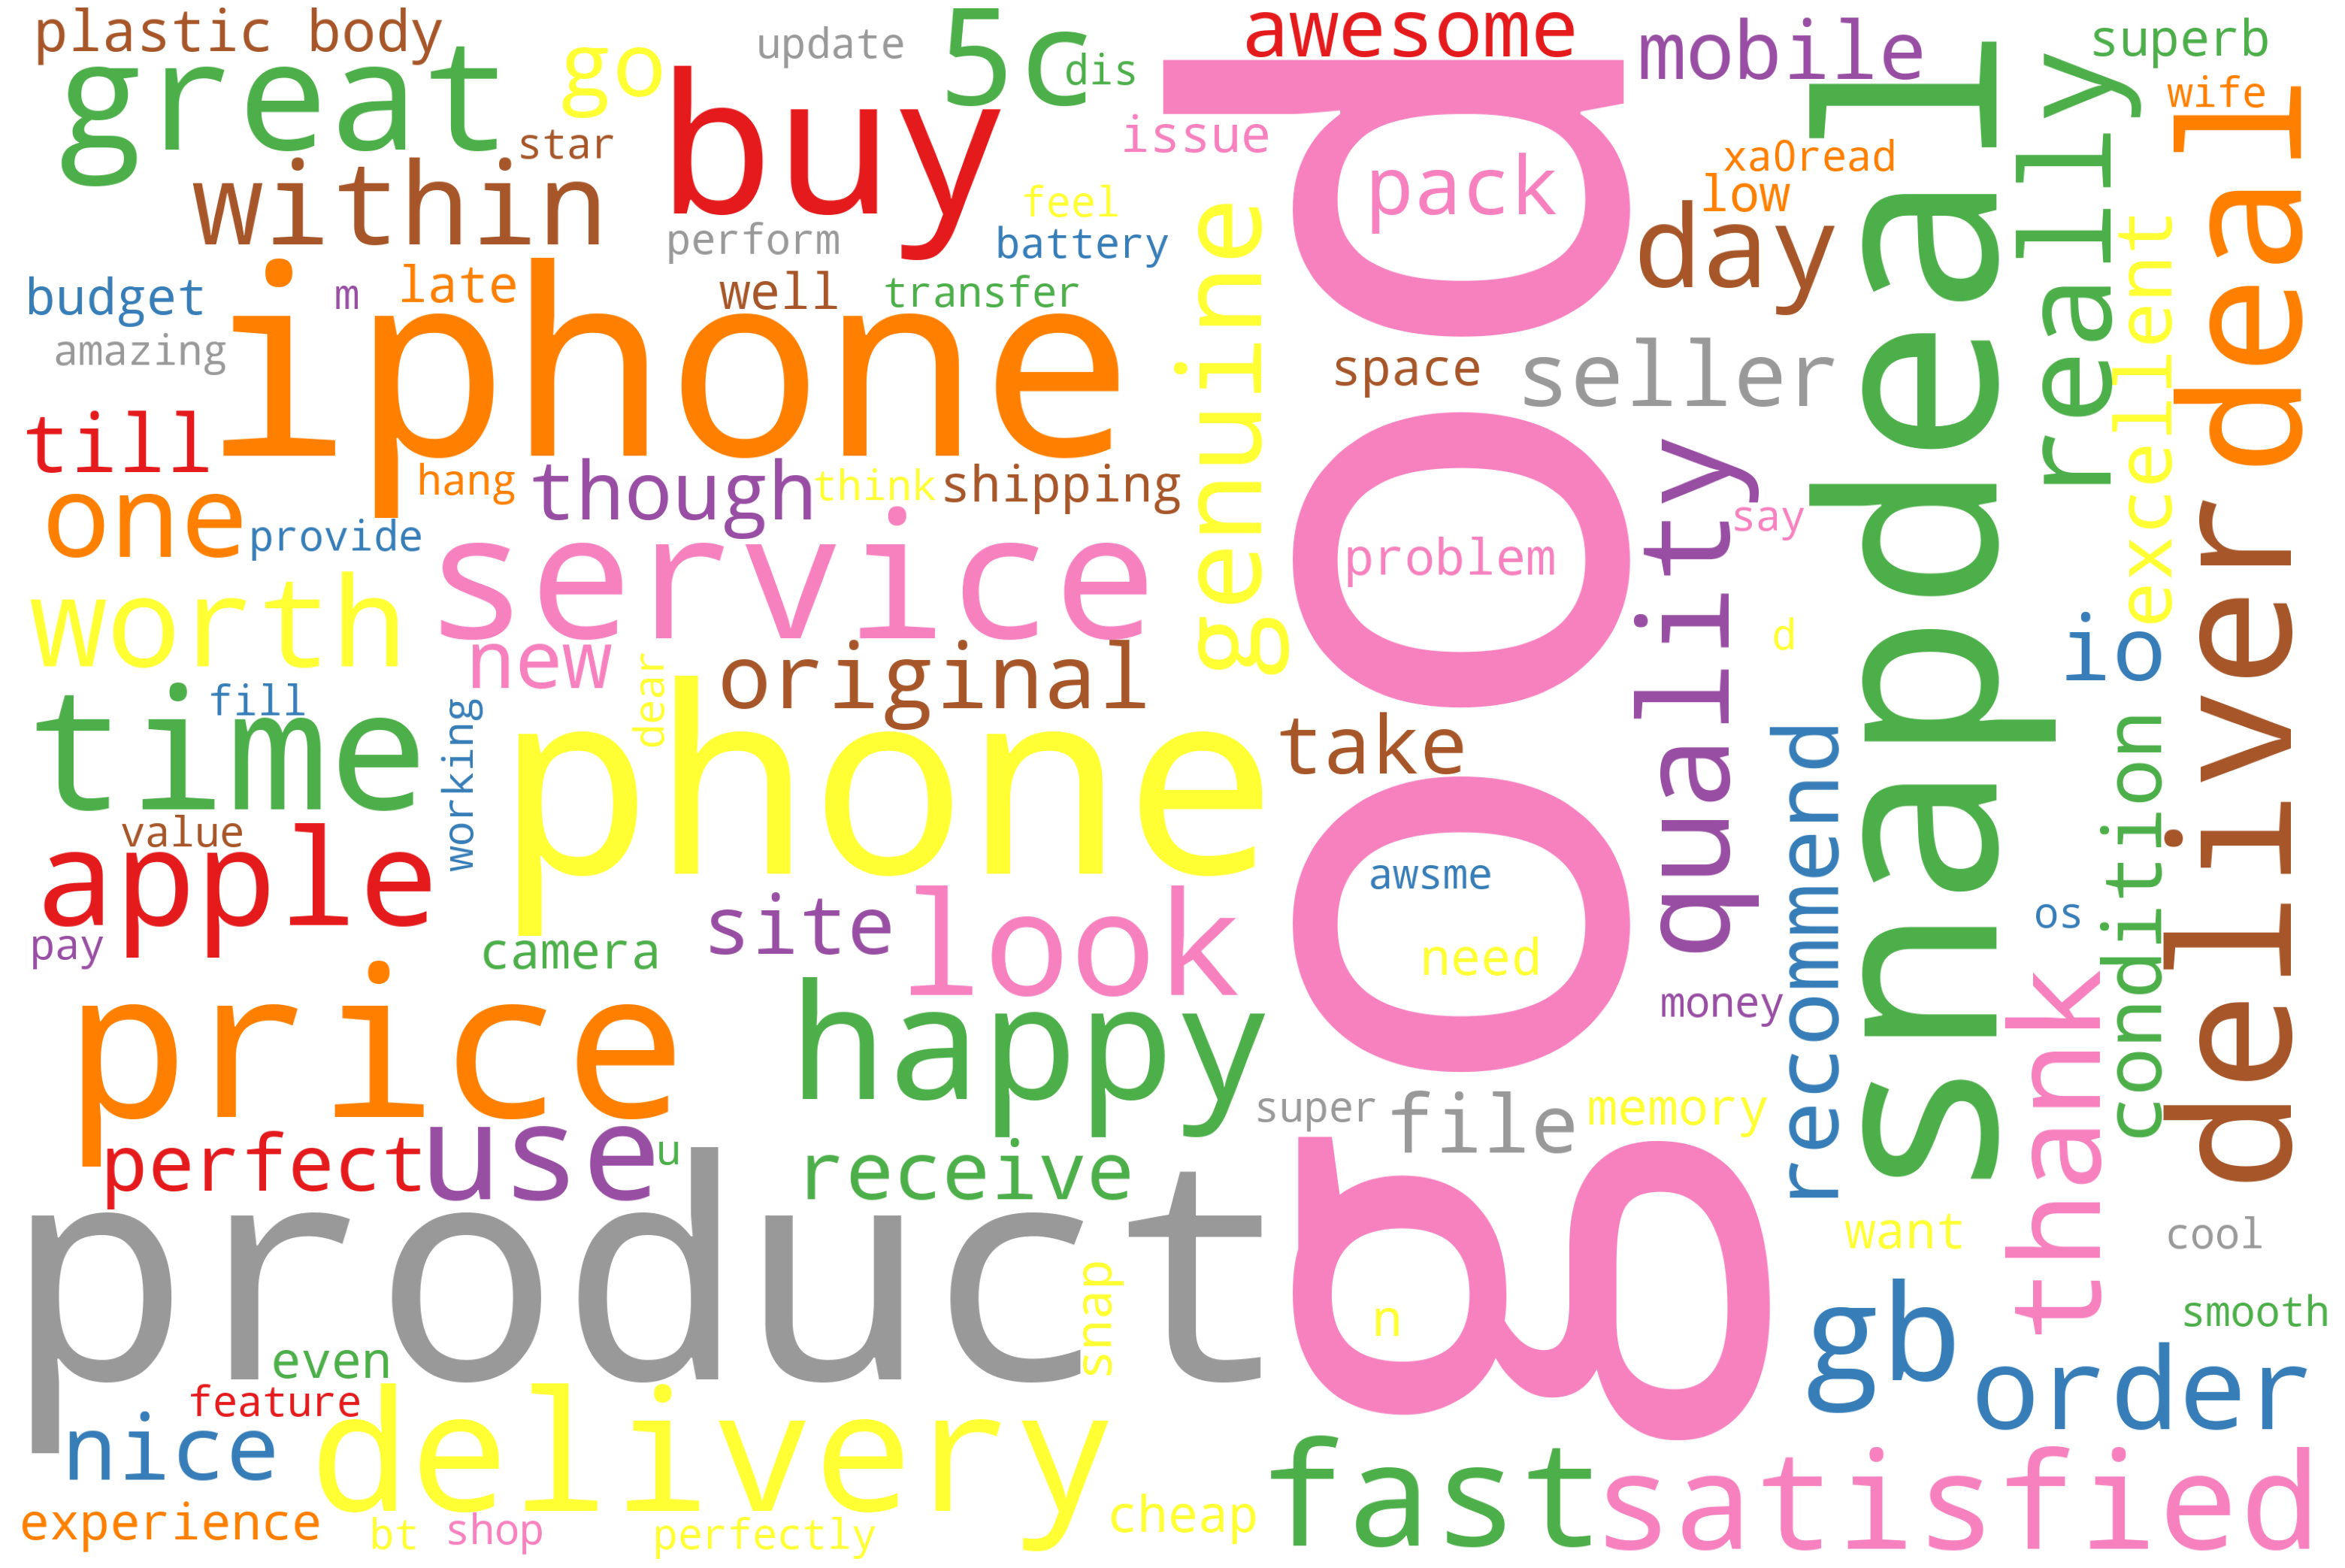

In [138]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

## Name Entity Recognition

In [139]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [140]:
for token in doc_block[100:200]:
    print(token,token.pos_)

doubt NOUN
but CCONJ
receive VERB
phone NOUN
really ADV
happyalso ADV
find VERB
original ADJ
iphoneearli ADJ
doubted ADJ
goood NOUN
fast ADJ
shipping NOUN
mobile NOUN
get AUX
hang VERB
smooth ADJ
touch NOUN
perform VERB
well ADV
this DET
great ADJ
experience NOUN
iphone NOUN
snapdeal ADJ
delivery NOUN
expectation NOUN
satisfied ADJ
buy NOUN
product NOUN
snapdeal ADJ
really ADV
happy ADJ
product NOUN
servicealway NOUN
good ADJ
good ADJ
product NOUN
do AUX
hang VERB
samsung PROPN
product NOUN
pathetic ADJ
use NOUN
grand PROPN
qauttro PROPN
use NOUN
take VERB
2030 NUM
second ADJ
open ADJ
even ADV
contact VERB
listnnapple ADJ
quality NOUN
product NOUN
only ADV
problem NOUN
need AUX
pay VERB
everything PRON
good ADJ
product NOUN
pack NOUN
also ADV
good ADJ
issue NOUN
courier NOUN
servicethey NOUN
take VERB
10 NUM
day NOUN
deliver VERB
awsme PROPN
delivry NOUN
time NOUN
product NOUN
recievd VERB
good ADJ
condition NOUN
think VERB
awsme PROPN
site NOUN
shop VERB
its PRON
cool ADJ
phone NOUN
g

In [141]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['site', 'shop', 'phone', 'processing', 'memory', 'space', 'total', 'gb', 'space', 'gb', 'fill', 'buy', 'deal', 'product', 'update', 'ios', 'deal', 'accessory', 'buy', 'product', 'product', 'd', 'phone', 'good', 'd', 'phone', 'look', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'dis', 'price', 'thumb', 'model', 'snapdeal', 'deliver', 'promise', 'time', 'product', 'price', 'seller', 'product', 'shipping', 'recommend', 'm', 'service', 'recommend', 'service', 'iphone', 'thank', 'provide', 'product', 'choice', 'deal', 'working', 'smooth', 'apple', 'worth', 'buy', 'deal', 'price', 'servicenthank', 'sd', 'phone', 'price', 'phone', 'service', 'seller', 'delivery', 'packing', 'feature', 'phone', 'get', 'heated', 'time', 'value', 'money']


In [142]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,26
3,price,17
4,buy,15
5,service,12
6,time,11
7,delivery,11
8,deliver,11
9,deal,11


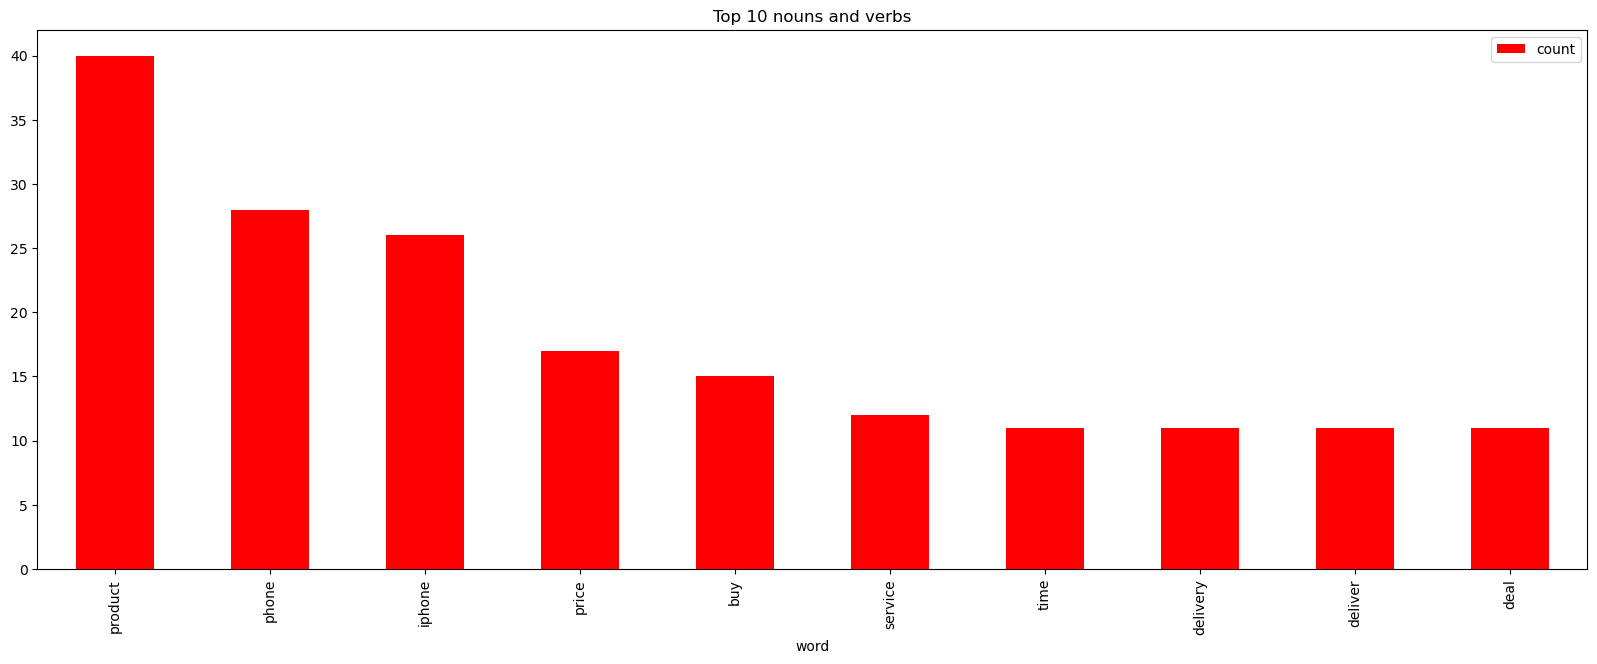

In [143]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');


## Emotion Mining Analysis

In [144]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['IPhone 5c good product on good price.',
 'Within one day I got the product though in site specied 3 working days.',
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.',
 'Other is good.',
 'I am new to iphone so till now this is it.',
 'iPhone 5c + Snapdeal before time delivery = 4 stars genuine product delivered within scheduled timframe.',
 'Thanks snapdeal !',
 'The OS will take around 5GB, leaving only 3 GB for your files.',
 "Unless you're not a heavy files user.",
 'Quality product from snapdeal.',
 'Delivery was on time.',
 'Lacks the feel.',
 'Great product at such amazing price.',
 'Delivery was fast.',
 'N iPhone is amazing.',
 'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that.',
 'But after receiving this phone I am really very happy.also

In [145]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,IPhone 5c good product on good price.
1,Within one day I got the product though in sit...
2,"Pros : Picture quality is awesome, sound with ..."
3,Other is good.
4,I am new to iphone so till now this is it.
...,...
122,"Excellent camera , crisp display ."
123,The battery issue has been solved with the la...
124,"good as like iphone, apple , and snapdeal ser..."
125,Camera is good and phone works perfectly.


In [146]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [147]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [148]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [149]:
# manual testing
calculate_sentiment(text= 'good')

3

In [150]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       6
1       0
2      12
3       3
4       0
       ..
122     3
123     1
124    11
125     6
126     7
Name: sentiment_value, Length: 127, dtype: int64

In [151]:
# no. words are there in a sentence
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       7
1      14
2      38
3       3
4      11
       ..
122     6
123    12
124    18
125     7
126    45
Name: word_count, Length: 127, dtype: int64

In [152]:
sent_df.sort_values(by= 'sentiment_value')

,sentence,sentiment_value,word_count
89,But those all reviews are fake and just to dam...,-6,14
37,Dere is only one problem nd dat is space... Bt...,-4,20
59,Dont buy on fraudulent schemes.,-4,5
66,no lagging till today\nsuitable for your busin...,-3,9
21,Only problem is you need to pay for everything.,-3,9
...,...,...,...
124,"good as like iphone, apple , and snapdeal ser...",11,18
2,"Pros : Picture quality is awesome, sound with ...",12,38
115,my wife wanted to try an iphone and she is lov...,16,34
47,Awesome mobile working smooth just like an app...,28,43


In [153]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.000000
mean       2.826772
std        4.677020
min       -6.000000
25%        0.000000
50%        2.000000
75%        4.500000
max       30.000000
Name: sentiment_value, dtype: float64

In [154]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,Within one day I got the product though in sit...,0,14
4,I am new to iphone so till now this is it.,0,11
5,iPhone 5c + Snapdeal before time delivery = 4 ...,0,16
7,"The OS will take around 5GB, leaving only 3 GB...",-1,13
8,Unless you're not a heavy files user.,0,7
9,Quality product from snapdeal.,0,4
10,Delivery was on time.,0,4
11,Lacks the feel.,-2,3
13,Delivery was fast.,0,3
18,Samsung products are pathetic.,-2,4


In [155]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,IPhone 5c good product on good price.,6,7
2,"Pros : Picture quality is awesome, sound with ...",12,38
3,Other is good.,3,3
6,Thanks snapdeal !,2,3
12,Great product at such amazing price.,7,6
...,...,...,...
122,"Excellent camera , crisp display .",3,6
123,The battery issue has been solved with the la...,1,12
124,"good as like iphone, apple , and snapdeal ser...",11,18
125,Camera is good and phone works perfectly.,6,7


In [156]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,IPhone 5c good product on good price.,6,7,0
1,Within one day I got the product though in sit...,0,14,1
2,"Pros : Picture quality is awesome, sound with ...",12,38,2
3,Other is good.,3,3,3
4,I am new to iphone so till now this is it.,0,11,4
...,...,...,...,...
122,"Excellent camera , crisp display .",3,6,122
123,The battery issue has been solved with the la...,1,12,123
124,"good as like iphone, apple , and snapdeal ser...",11,18,124
125,Camera is good and phone works perfectly.,6,7,125


C:\Users\shubh\AppData\Local\Temp\ipykernel_18520\3029961482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color="black")


<Axes: xlabel='sentiment_value', ylabel='Density'>

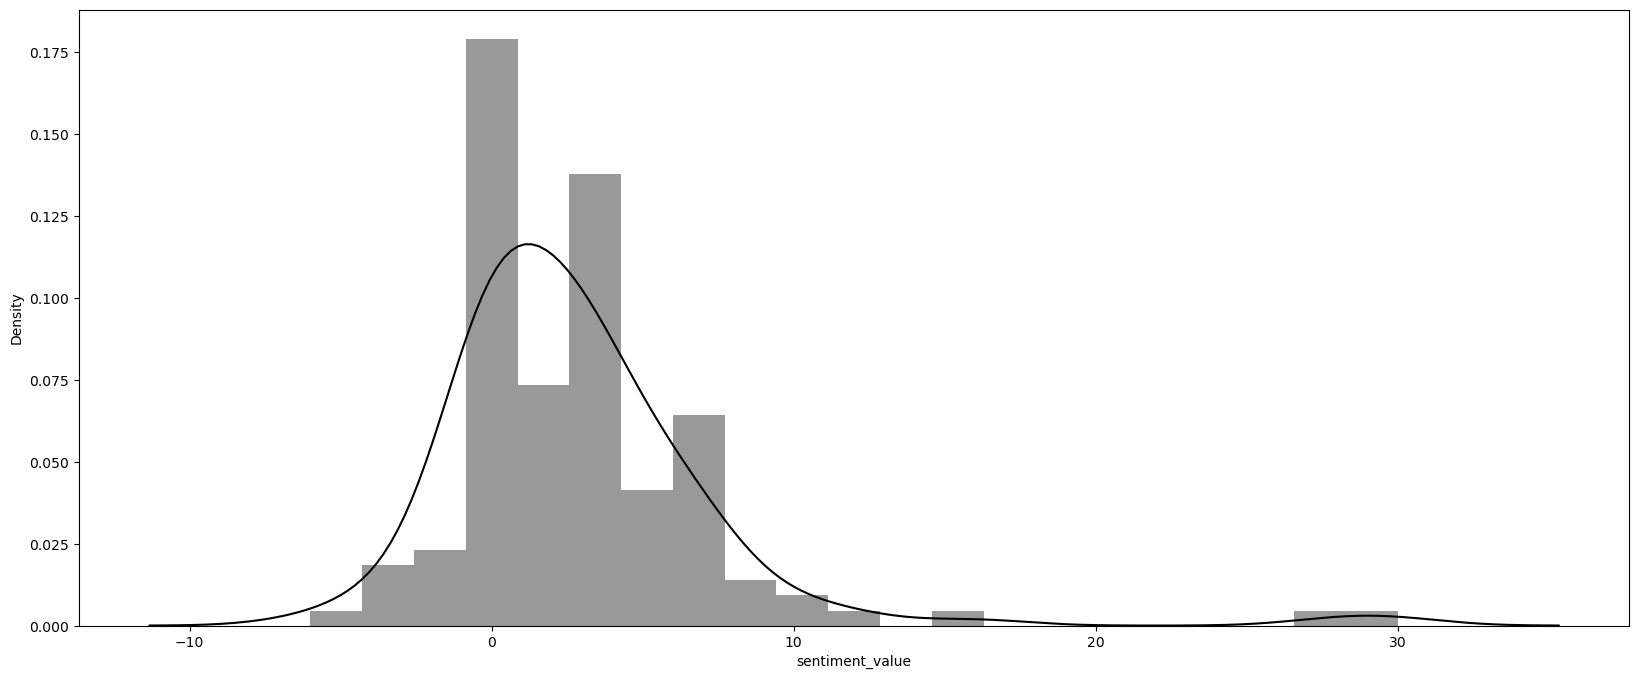

In [157]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

<Axes: xlabel='index', ylabel='sentiment_value'>

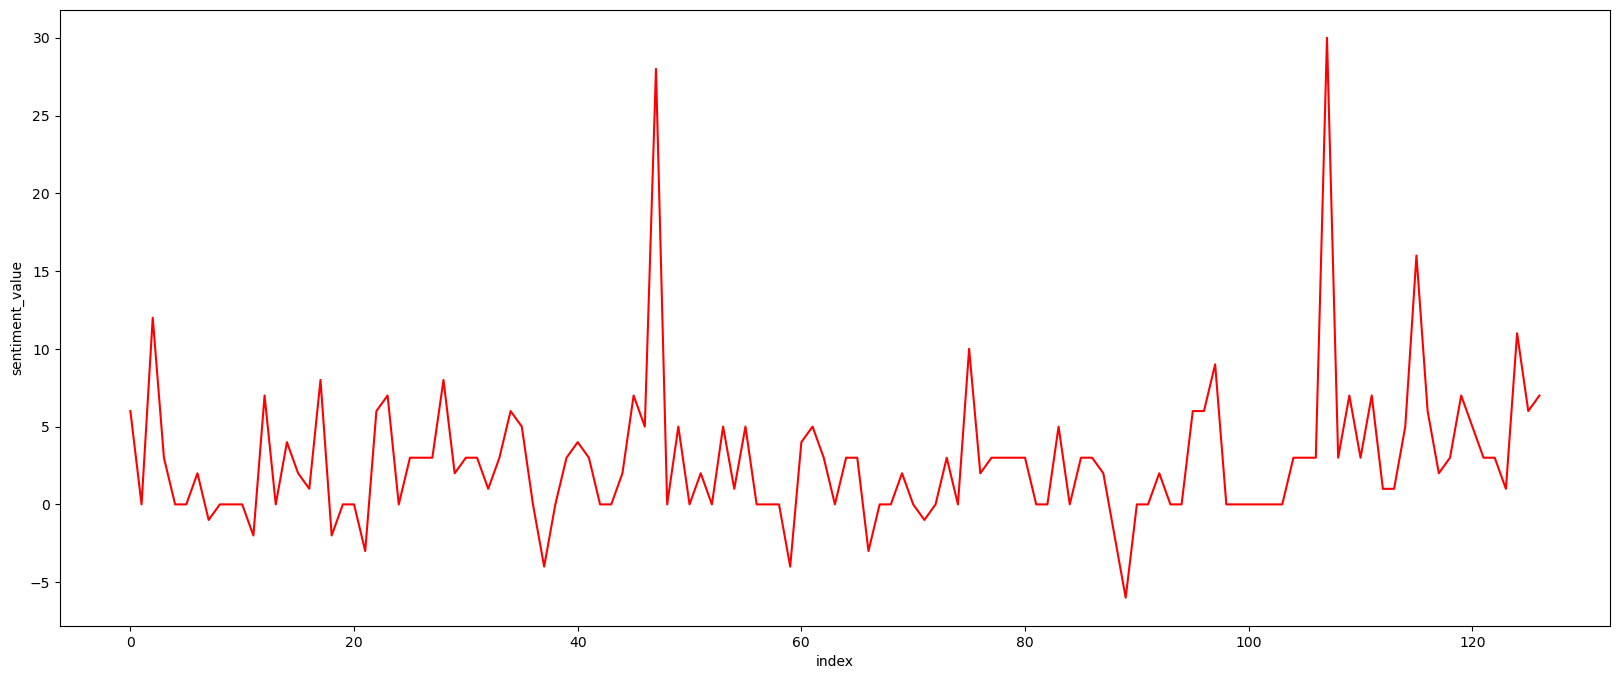

In [158]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize= (20,8))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df,color= 'red')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

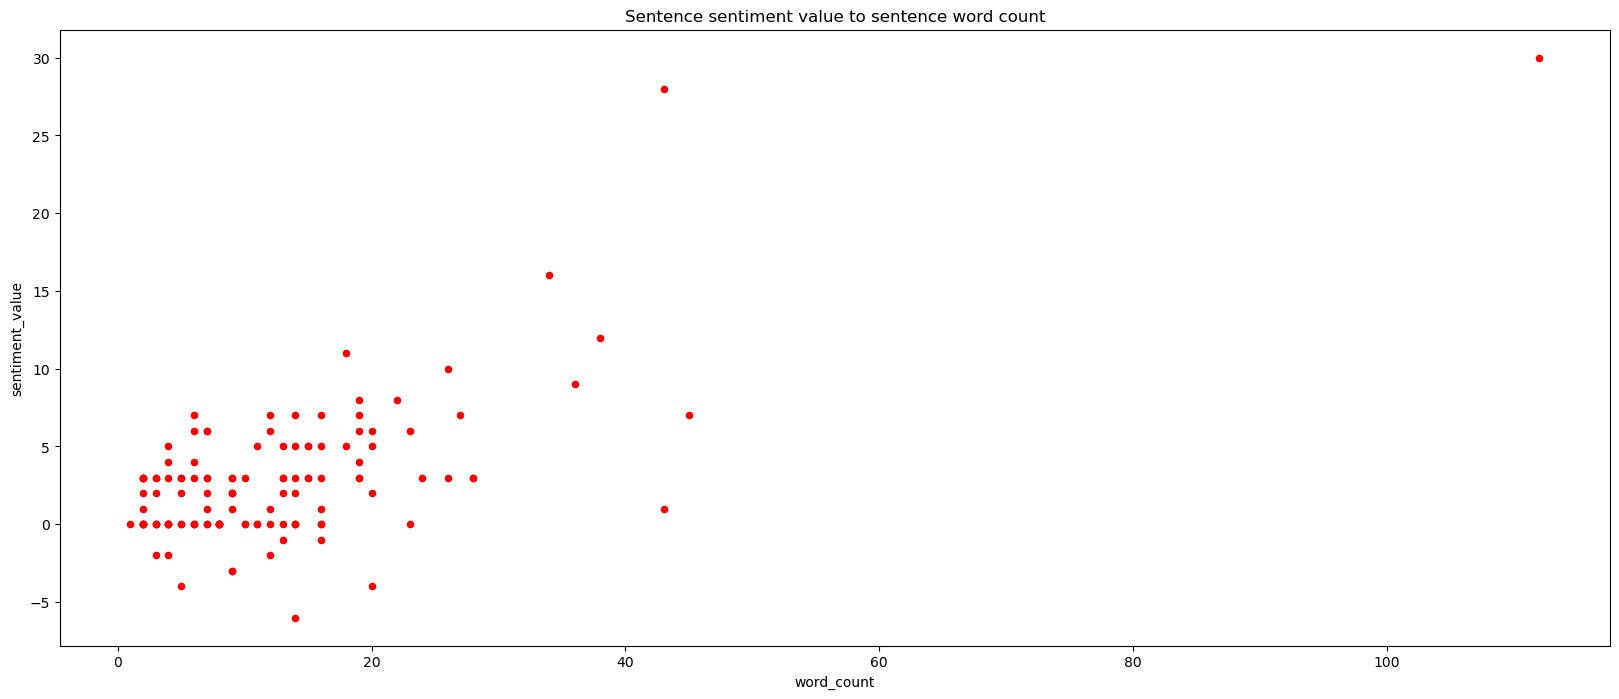

In [159]:
# Correlation analysis
sent_df.plot.scatter(x= 'word_count',y= 'sentiment_value',figsize=(20,8),title= 'Sentence sentiment value to sentence word count',color='red')